In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("housing.csv")


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12808,-121.47,38.63,29.0,2197.0,520.0,1374.0,483.0,2.1889,INLAND,69300.0
18195,-122.01,37.39,26.0,2500.0,962.0,2374.0,879.0,3.5586,<1H OCEAN,222200.0
10754,-117.89,33.60,40.0,1639.0,352.0,498.0,278.0,5.6336,<1H OCEAN,500001.0
10258,-117.87,33.85,33.0,45.0,11.0,34.0,10.0,5.2949,<1H OCEAN,350000.0
14399,-117.25,32.75,37.0,1189.0,377.0,645.0,377.0,2.4672,NEAR OCEAN,216700.0
...,...,...,...,...,...,...,...,...,...,...
2212,-119.86,36.80,18.0,2536.0,516.0,1196.0,466.0,2.5595,INLAND,67900.0
20274,-119.23,34.15,18.0,6213.0,1188.0,2679.0,1000.0,3.7480,NEAR OCEAN,380400.0
17288,-119.74,34.38,32.0,1479.0,287.0,830.0,288.0,5.3450,NEAR OCEAN,322600.0
18985,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,INLAND,81300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

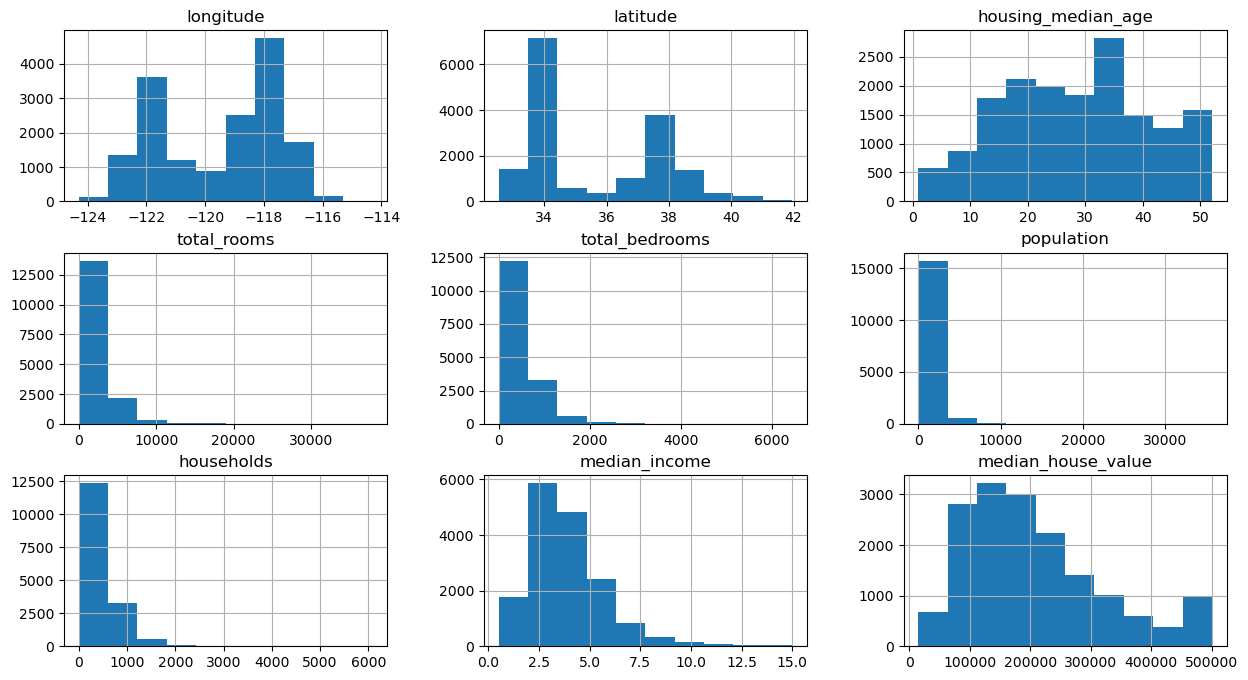

In [ ]:
train_data.hist(figsize=(15, 8))

<Axes: >

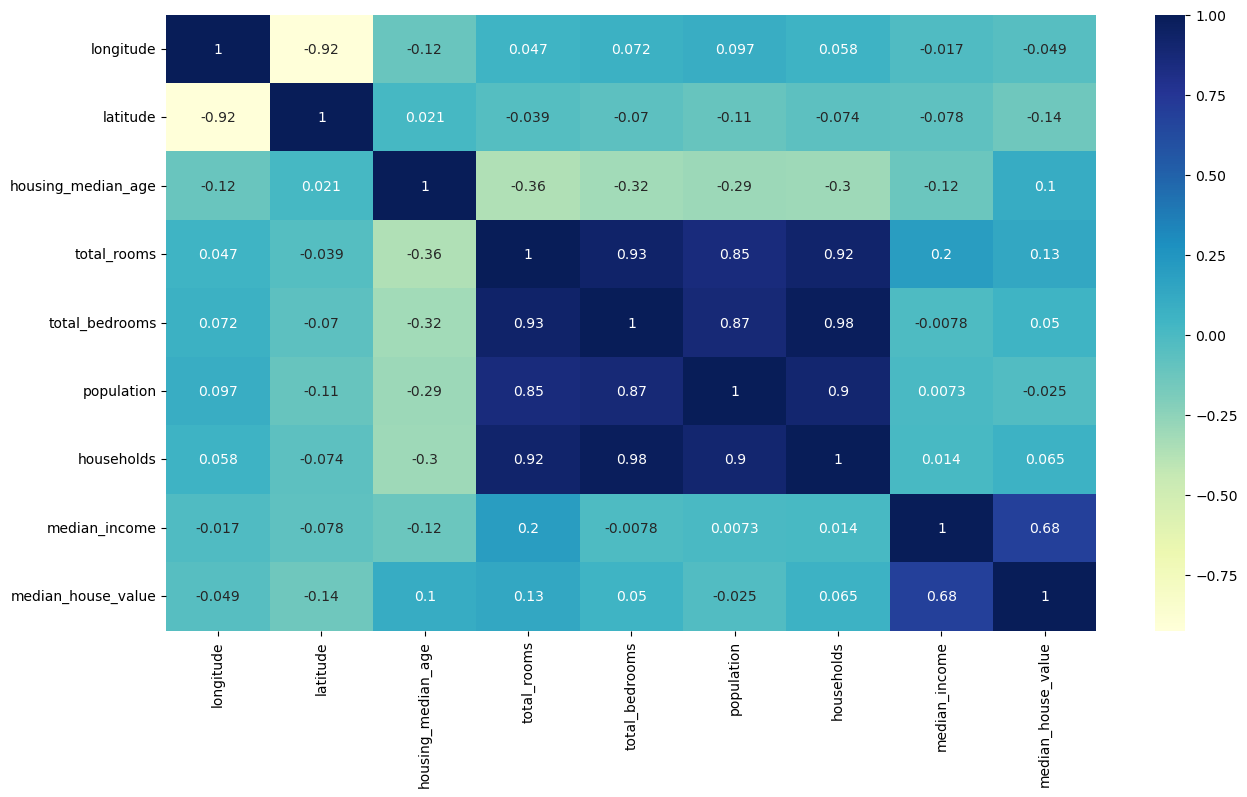

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms']= np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] +1)
train_data['population']= np.log(train_data['population'] +1)
train_data['households']= np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

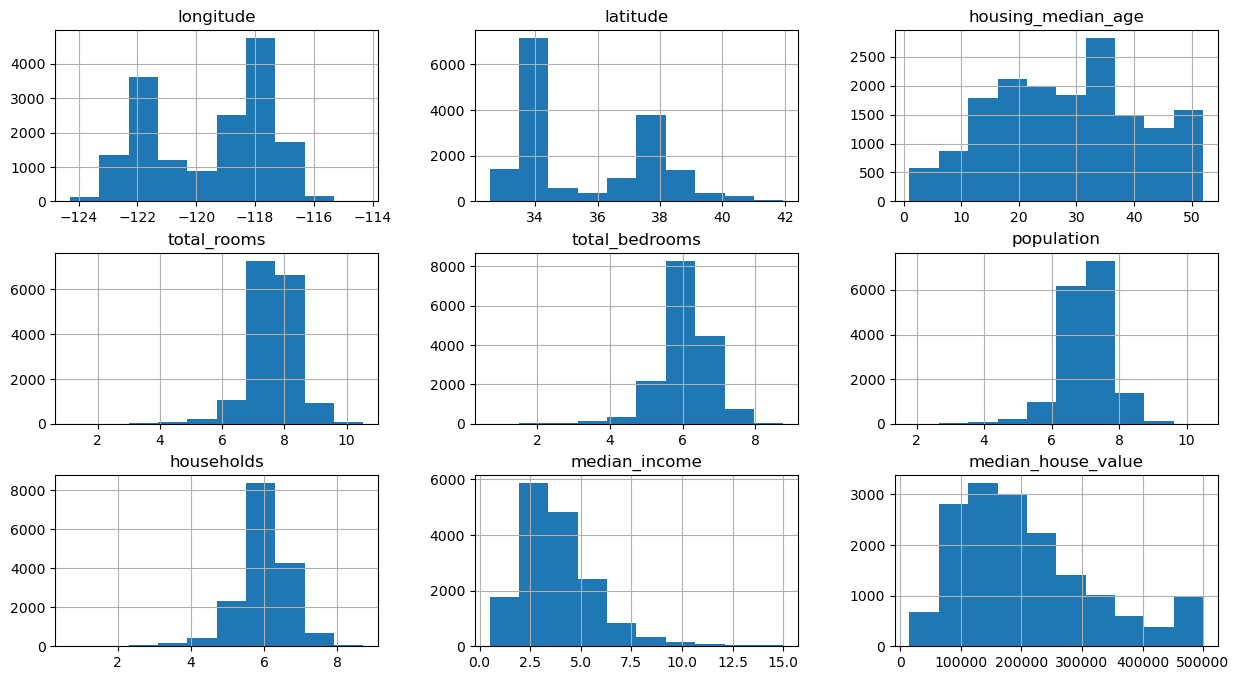

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12808,-121.47,38.63,29.0,7.695303,6.255750,7.226209,6.182085,2.1889,69300.0,False,True,False,False,False
18195,-122.01,37.39,26.0,7.824446,6.870053,7.772753,6.779922,3.5586,222200.0,True,False,False,False,False
10754,-117.89,33.60,40.0,7.402452,5.866468,6.212606,5.631212,5.6336,500001.0,True,False,False,False,False
10258,-117.87,33.85,33.0,3.828641,2.484907,3.555348,2.397895,5.2949,350000.0,True,False,False,False,False
14399,-117.25,32.75,37.0,7.081709,5.934894,6.470800,5.934894,2.4672,216700.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,-119.86,36.80,18.0,7.838738,6.248043,7.087574,6.146329,2.5595,67900.0,False,True,False,False,False
20274,-119.23,34.15,18.0,8.734560,7.080868,7.893572,6.908755,3.7480,380400.0,False,False,False,False,True
17288,-119.74,34.38,32.0,7.299797,5.662960,6.722630,5.666427,5.3450,322600.0,False,False,False,False,True
18985,-121.94,38.27,35.0,9.293762,7.708411,9.198268,7.674617,2.5681,81300.0,False,True,False,False,False


<Axes: >

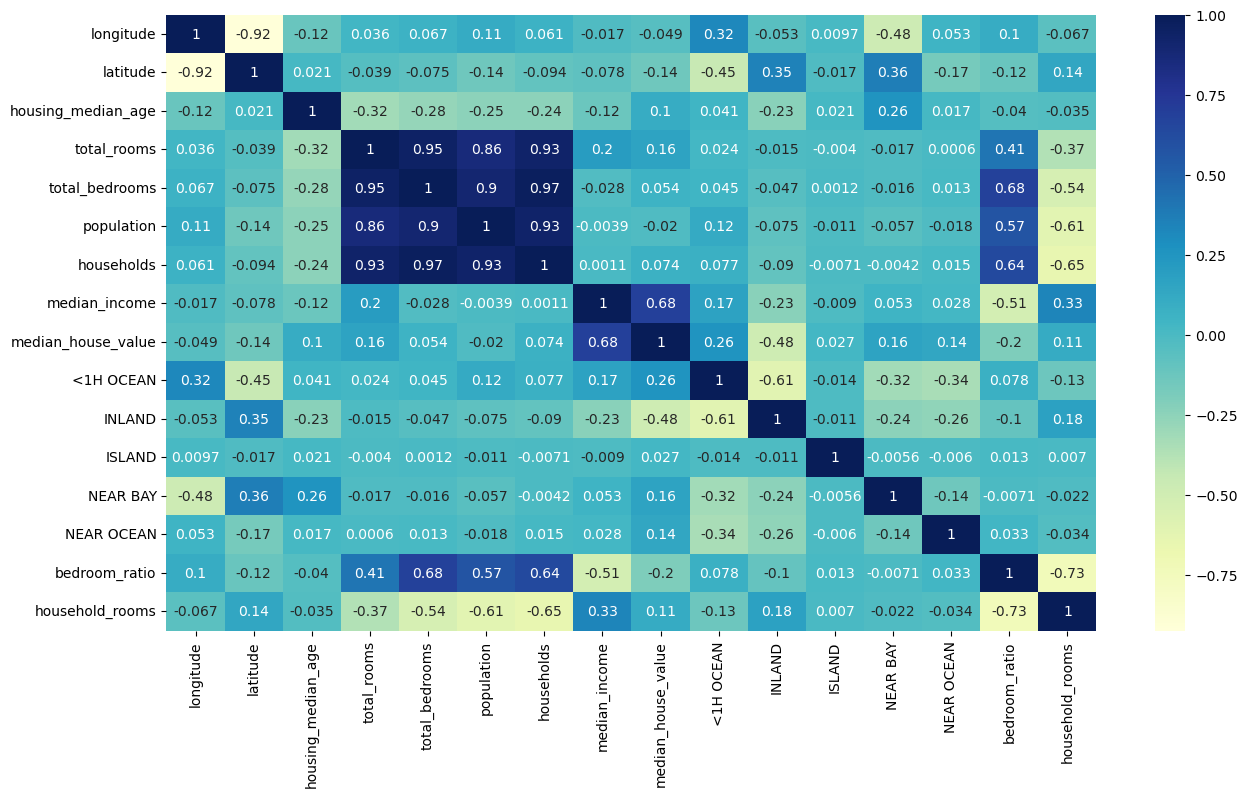

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

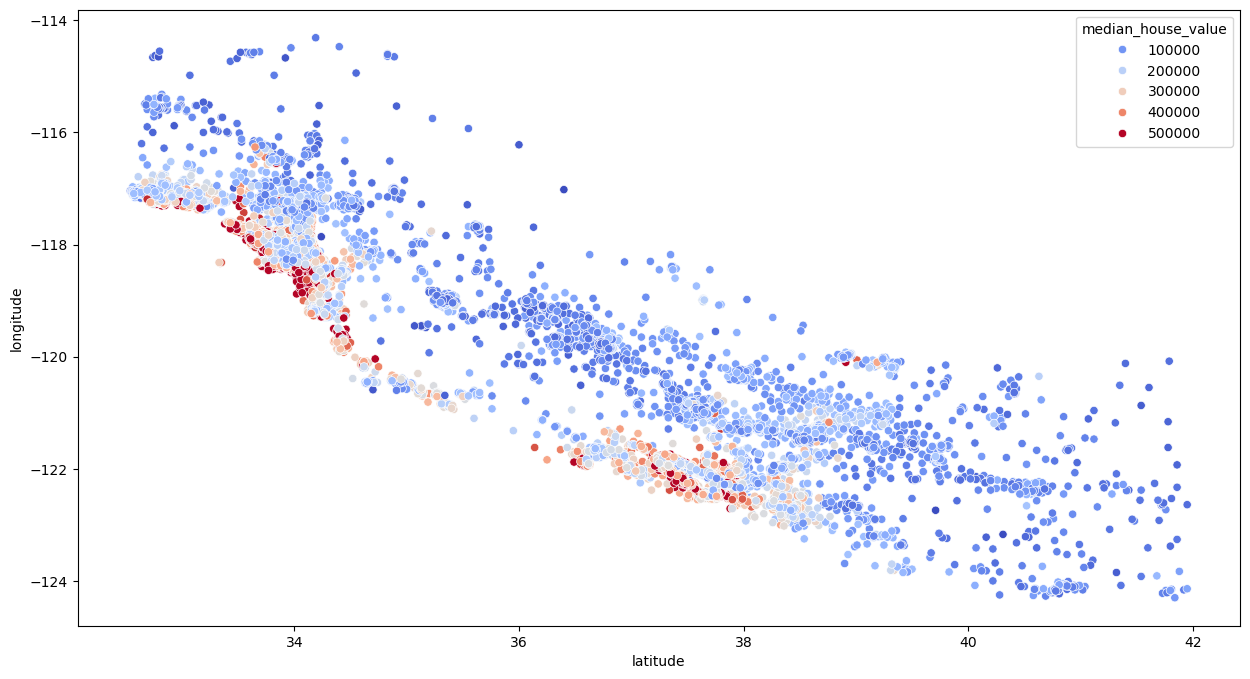

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data["bedroom_ratio"] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

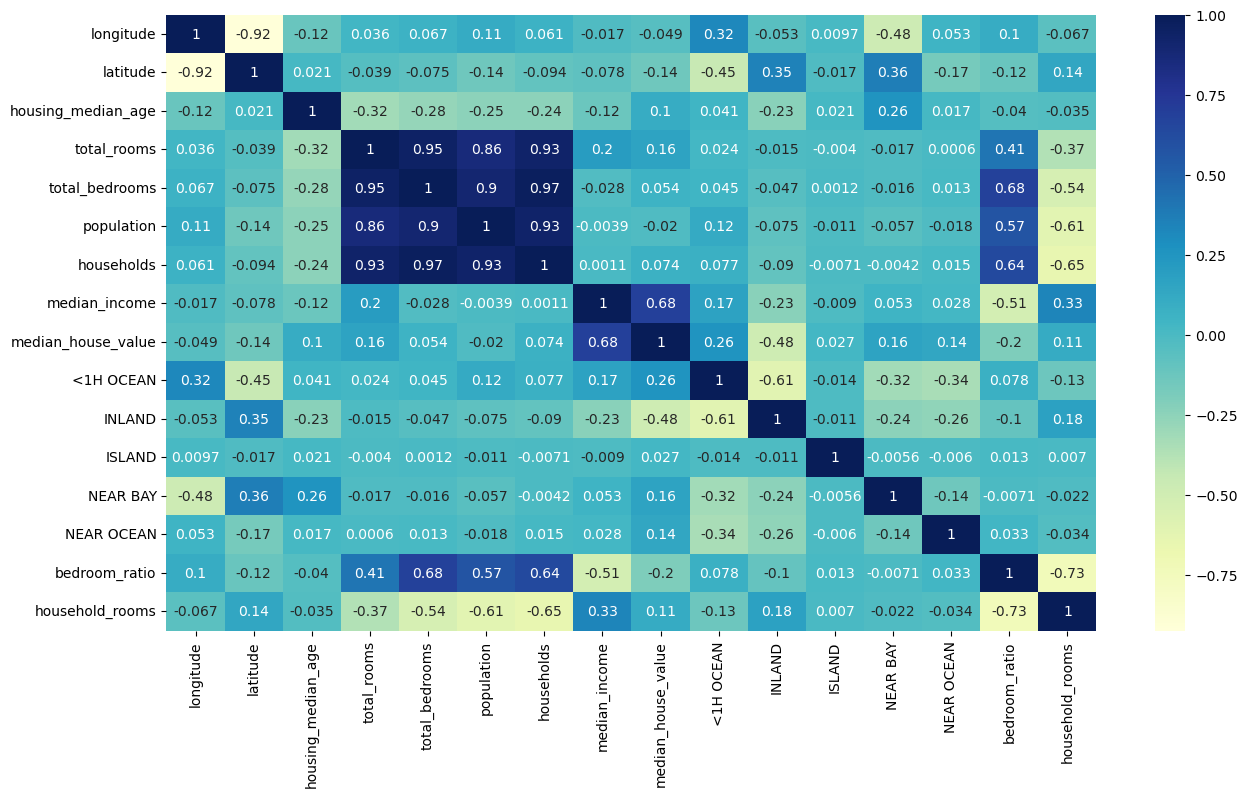

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression



X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'] +1)
test_data['population']= np.log(test_data['population'] +1)
test_data['households']= np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data["bedroom_ratio"] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
4765,-118.35,34.04,38.0,7.394493,5.929589,6.927558,5.921578,2.3687,146800.0,True,False,False,False,False,0.801893,1.248737
10417,-117.65,33.53,7.0,8.826881,6.666957,7.685244,6.525030,10.4900,500001.0,True,False,False,False,False,0.755302,1.352773
8336,-118.31,33.94,40.0,7.188413,5.497168,6.529419,5.438079,3.2206,145800.0,True,False,False,False,False,0.764726,1.321866
1948,-120.84,38.77,11.0,6.921658,5.241747,6.018593,5.068904,4.8250,184600.0,False,True,False,False,False,0.757296,1.365514
6586,-118.22,34.22,39.0,7.896181,6.035481,6.998510,5.998937,7.0059,500001.0,True,False,False,False,False,0.764355,1.316263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18820,-120.24,39.67,52.0,5.693732,4.158883,4.969813,4.043051,3.6250,68600.0,False,True,False,False,False,0.730432,1.408276
12552,-121.48,38.56,52.0,6.703188,5.379897,5.793014,5.204007,2.8542,125000.0,False,True,False,False,False,0.802588,1.288082
18060,-122.02,37.26,34.0,7.475906,5.497168,6.541030,5.411646,8.0331,500001.0,True,False,False,False,False,0.735318,1.381448
642,-122.14,37.73,38.0,7.452402,5.978886,6.568078,5.869297,3.0673,218400.0,False,False,False,True,False,0.802276,1.269727


In [ ]:
reg.score(X_test, y_test)

0.6773445842083303

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, y_test)

0.8354758913618889

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train, y_train)
                           
    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test, y_test)

0.8355804751854868